# In-depth CSFLA parameter tuning

After having done some exploratory tuning on 3 months of data (see preliminary_csfla_tuning_analysis.ipynb), I now tune the algorithm on 3 months * 3 currency pairs of data. 

The methodology remains the same as with the preliminary tuning: 

First, we isolate each parameter to test its influence on performance results and try to extract knowledge from it in the first part, 'parametric analysis'.

We then try to find some good combinations of these attributes in the second part, 'combinatorial analysis'.

Finally, we test the combinations, tune the most performing, and choose a final PSO configuration which we will use as the final product and use for the testing data.

## I. Parametric analysis

In [1]:
# Libraries and helper functions
import pickle
import json
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from toolz import get_config, get_all_config_results

def plot_configs(df):
    plt.plot(df.loc['value'], label='fitness')
    plt.plot(df.loc['mdd'])
    plt.plot(df.loc['ret'], label='return')
    plt.xticks(rotation=20)
    plt.xlabel('Configurations', size=14)
    plt.ylabel('Value', size=14)
    plt.title("Average fitness value on test months for 4 currency pairs")
    plt.legend()
    plt.show()

In [2]:
cfg = get_config(file='../config/training_config.json')
df = get_all_config_results(cfg, '../config/algos/csfla_param_exp_configs.json')
mean_by_config = pd.pivot_table(df, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)
mean_by_config

config name         csfla reference  even lower generations  \
mdd                        0.000449                0.000453   
no_of_transactions        24.455093               23.715046   
realised_profit            0.495965                0.770835   
ret                        0.000099                0.000154   
value                      0.000009                0.000064   
wealth                500000.495965           500000.770835   

config name         extreme niching 1  extreme niching 2  extreme niching 3  \
mdd                          0.000664           0.000845           0.000769   
no_of_transactions          19.986343          18.965278          23.076488   
realised_profit              1.455586           1.503166           1.070007   
ret                          0.000291           0.000301           0.000214   
value                        0.000158           0.000132           0.000060   
wealth                  500001.455586      500001.503166      500001.070007   

config name         extreme niching expensive  extreme niching expensive 4  \
mdd                                  0.000385                     0.000795   
no_of_transactions                  22.111111                    22.160417   
realised_profit                      0.679716                     1.598367   
ret                                  0.000136                     0.000320   
value                                0.000059                     0.000161   
wealth                          500000.679716                500001.598367   

config name         extreme niching expensive 5  extreme niching expensive l6  \
mdd                                    0.000762                      0.000755   
no_of_transactions                    21.362037                     20.380556   
realised_profit                        1.248551                      1.252492   
ret                                    0.000250                      0.000250   
value                                  0.000097                      0.000099   
wealth                            500001.248551                 500001.252492   

config name         extreme niching expensive low gen          ...           \
mdd                                          0.000789          ...            
no_of_transactions                          21.413889          ...            
realised_profit                              1.523377          ...            
ret                                          0.000305          ...            
value                                        0.000147          ...            
wealth                                  500001.523377          ...            

config name         low scaled highest n frogs   low sub generations  \
mdd                                    0.000399             0.000380   
no_of_transactions                    23.168519            21.591204   
realised_profit                        0.380954             0.374977   
ret                                    0.000076             0.000075   
value                                 -0.000004            -0.000001   
wealth                            500000.380954        500000.374977   

config name         medium generations  medium n frogs  medium n memeplexes  \
mdd                           0.000450        0.000399             0.000400   
no_of_transactions           22.385053       22.828704            24.112037   
realised_profit               0.571473        0.607538             0.650197   
ret                           0.000114        0.000122             0.000130   
value                         0.000024        0.000042             0.000050   
wealth                   500000.571473   500000.607538        500000.650197   

config name         medium n sm frogs  medium sub generations  \
mdd                          0.000488                0.000415   
no_of_transactions          22.381481               19.611343   
realised_profit              0.534128                0.403155   
ret             

## N Frogs

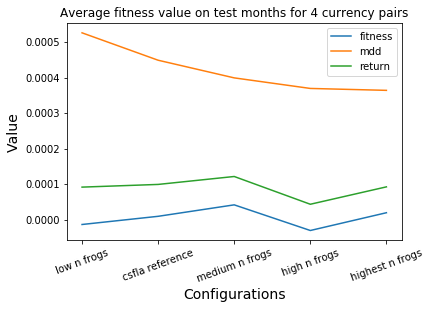

In [3]:
plot_configs(mean_by_config[['low n frogs', 'csfla reference', 'medium n frogs', 'high n frogs', 'highest n frogs']])

I think that what happens here is that when we increase the number of frogs (from low to medium) we get an increase in fitness because we can explore better the search space, but when the number of frogs gets too high, we have a decrease of fitness because the more the frogs, the less likely a high performance frog has the chance to be selected for evolution, so we have less evolved frogs and thus lower fitness.

## N memeplexes

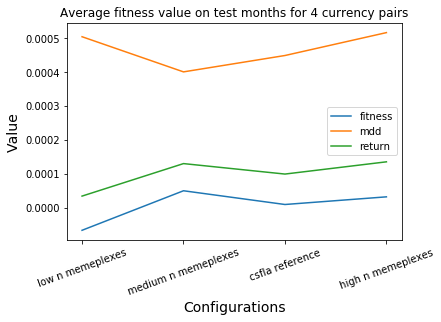

In [36]:
plot_configs(mean_by_config[['low n memeplexes',  'medium n memeplexes', 'csfla reference', 'high n memeplexes']])

The more the memeplexes, the higher the chance of a frog to be evolved, and thus the higher the global fitness.

## Number of frogs selected for sub-memeplex

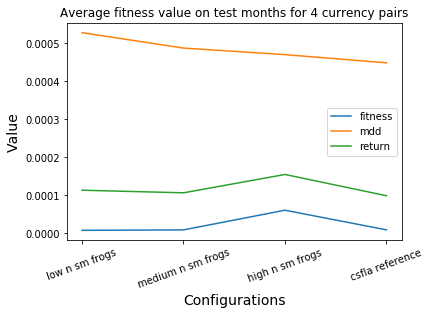

In [37]:
plot_configs(mean_by_config[['low n sm frogs',  'medium n sm frogs','high n sm frogs', 'csfla reference']])

## Number of generations

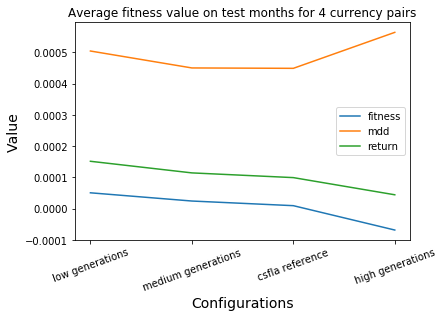

In [38]:
plot_configs(mean_by_config[['low generations', 'medium generations', 'csfla reference', 'high generations']])

This is interesting, it's the opposite of what I expected. Maybe this means that csfla is able to generate good initial  candidates with only a bit of evolution, and that it's a bad optimizer over time. Maybe we could use the csfla as a meta-metaheuristic for the pso, so we give good inital candidates to the pso which evolves it on the optimum.

## Number of sub-memeplex generations

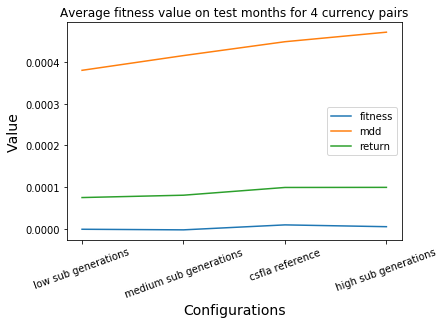

In [39]:
plot_configs(mean_by_config[['low sub generations', 'medium sub generations', 'csfla reference', 'high sub generations']])

The higher the number of sub-generations, the more the generations will be optimized. I could try and increase even more the number of sub generations

## Round 2

Before jumping to conclusions, I try to push the number of sub-memeplex generations, by creating additionnal configs with higher sub generations.


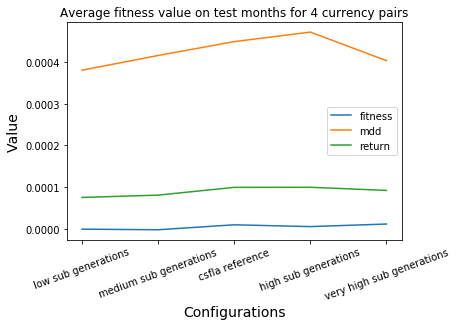

In [40]:
plot_configs(mean_by_config[['low sub generations', 'medium sub generations', 'csfla reference', 'high sub generations', 'very high sub generations']])

In [41]:
mean_by_config[['low sub generations', 'medium sub generations', 'csfla reference', 'high sub generations', 'very high sub generations']]

config name         low sub generations  medium sub generations  \
mdd                            0.000380                0.000415   
no_of_transactions            21.591204               19.611343   
realised_profit                0.374977                0.403155   
ret                            0.000075                0.000081   
value                         -0.000001               -0.000002   
wealth                    500000.374977           500000.403155   

config name         csfla reference  high sub generations  \
mdd                        0.000449              0.000472   
no_of_transactions        24.455093             22.192593   
realised_profit            0.495965              0.497140   
ret                        0.000099              0.000099   
value                      0.000009              0.000005   
wealth                500000.495965         500000.497140   

config name         very high sub generations  
mdd                                  0.000403  
no_of_transactions                  23.286111  
realised_profit                      0.459547  
ret                                  0.000092  
value                                0.000011  
wealth                          500000.459547

It seems that increasing the number of sub generations is a good idea, even though we loose a bit of return we decrease mdd so the overall fitness increases with the number of sub generations. However execution seemed much more slow (which makes sense)

At this point, my intuition for this algorithm is that by increasing capacity (number of frogs), you can increase fitness, as long as you keep increasing the chance for the frogs to be more performing. 

It seems that regardless of capacity increasing the number of sub generations is a good idea because the algorithm is shuffling/stochastic enough to avoid overfitting on optimums.

It looks as if when we increase the number of generations, we can mix up the local optimums too much (the frogs jump around too much). To confirm this I run the algorithm with some even lower values of generation numbers. If I'm correct we should have higher fitness for lower number of generations but if the number of generations is too low (say, only one generation), we could loose the frog-leaping aspect and thus loose the benefit of exchanging information between optimums. However, if we have a higher fitness even with 1 generation, it could indicate that exchanging information between optimums is irrelevant for our problem (which could explain why pso rush strategy performs well for example), that the optimums are too seperate/different from one another. This could give us valuable insight towards the problem




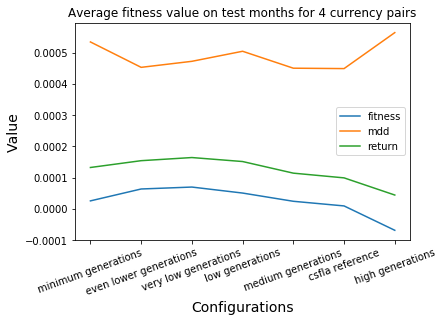

In [42]:
plot_configs(mean_by_config[['minimum generations', 'even lower generations', 'very low generations' , 'low generations', 'medium generations', 'csfla reference', 'high generations']])

In [43]:
mean_by_config[['minimum generations', 'even lower generations', 'very low generations' , 'low generations', 'medium generations', 'csfla reference', 'high generations']]

config name         minimum generations  even lower generations  \
mdd                            0.000534                0.000453   
no_of_transactions            21.479630               23.715046   
realised_profit                0.661957                0.770835   
ret                            0.000132                0.000154   
value                          0.000026                0.000064   
wealth                    500000.661957           500000.770835   

config name         very low generations  low generations  medium generations  \
mdd                             0.000472         0.000504            0.000450   
no_of_transactions             23.191667        20.297222           22.385053   
realised_profit                 0.821022         0.757194            0.571473   
ret                             0.000164         0.000151            0.000114   
value                           0.000070         0.000051            0.000024   
wealth                     500000.821022    500000.757194       500000.571473   

config name         csfla reference  high generations  
mdd                        0.000449          0.000564  
no_of_transactions        24.455093         24.247685  
realised_profit            0.495965          0.221359  
ret                        0.000099          0.000044  
value                      0.000009         -0.000068  
wealth                500000.495965     500000.221359

It looks like our hypothesis was only partly true: it's still a good idea to exchange a little amout of information between the optimums. 

As a result of this analysis, I would like to test if we can get an increase of fitness if we increase the number of frogs while proportionnaly increasing the number of memeplexes.

In [44]:
mean_by_config[['low scaled high n frogs', 'high scaled high n frogs', 'low scaled highest n frogs ',  "high scaled highest n frogs "]]

config name         low scaled high n frogs  high scaled high n frogs  \
mdd                                0.000396                  0.000388   
no_of_transactions                24.762963                 23.920370   
realised_profit                    0.368050                  0.539773   
ret                                0.000074                  0.000108   
value                             -0.000006                  0.000030   
wealth                        500000.368050             500000.539773   

config name         low scaled highest n frogs   high scaled highest n frogs   
mdd                                    0.000399                      0.000388  
no_of_transactions                    23.168519                     23.920370  
realised_profit                        0.380954                      0.539773  
ret                                    0.000076                      0.000108  
value                                 -0.000004                      0.000030  
wealth                            500000.380954                 500000.539773

This is very interesting, it seems like the number of frogs doesn't really matter, that it's rather the number of frogs in the sub memeplexes that count.

The low scaled configurations have the same number of frogs (60 for high, and 100 for highest), high number of memeplexes (so you'd expect them to explore more optimums), but lower number of frogs per sub meme plexes. 

Also higher number of frogs does not mean higher fitness (same results in high scaled configs). So in our proposed configurations we can take this into account to have cheaper and still effective configurations. 

# 2. Combinatorial Analysis

First, I test out the configs of my preliminary experiment on this new training data:


In [45]:
mean_by_config[["extreme niching expensive", "global cheap", "global expensive"]]

config name         extreme niching expensive   global cheap  global expensive
mdd                                  0.000385       0.000373          0.000508
no_of_transactions                  22.111111      20.618717         22.475926
realised_profit                      0.679716       0.276358          0.285408
ret                                  0.000136       0.000055          0.000057
value                                0.000059      -0.000019         -0.000045
wealth                          500000.679716  500000.276358     500000.285408

It's interesting to see that global cheap and global expensive did not do very well, so i'm grateful for this second round of analysis! Extreme niching yields correct results, I'll try to map my next configurations based on it.

## Recap

The best performing configurations so far are: 

In [46]:
mean_by_config.sort_values('value', axis=1)

config name         high generations  low n memeplexes  global expensive  \
mdd                         0.000564          0.000504          0.000508   
no_of_transactions         24.247685         25.499074         22.475926   
realised_profit             0.221359          0.171108          0.285408   
ret                         0.000044          0.000034          0.000057   
value                      -0.000068         -0.000067         -0.000045   
wealth                 500000.221359     500000.171108     500000.285408   

config name          high n frogs   global cheap    low n frogs  \
mdd                      0.000369       0.000373       0.000526   
no_of_transactions      22.865741      20.618717      23.248148   
realised_profit          0.216884       0.276358       0.458005   
ret                      0.000043       0.000055       0.000092   
value                   -0.000030      -0.000019      -0.000014   
wealth              500000.216884  500000.276358  500000.458005   

config name         low scaled high n frogs  low scaled highest n frogs   \
mdd                                0.000396                     0.000399   
no_of_transactions                24.762963                    23.168519   
realised_profit                    0.368050                     0.380954   
ret                                0.000074                     0.000076   
value                             -0.000006                    -0.000004   
wealth                        500000.368050                500000.380954   

config name         medium sub generations  low sub generations  \
mdd                               0.000415             0.000380   
no_of_transactions               19.611343            21.591204   
realised_profit                   0.403155             0.374977   
ret                               0.000081             0.000075   
value                            -0.000002            -0.000001   
wealth                       500000.403155        500000.374977   

config name                    ...               very low generations  \
mdd                            ...                           0.000472   
no_of_transactions             ...                          23.191667   
realised_profit                ...                           0.821022   
ret                            ...                           0.000164   
value                          ...                           0.000070   
wealth                         ...                      500000.821022   

config name         low gen high scaled  extreme niching expensive 5  \
mdd                            0.000626                     0.000762   
no_of_transactions            23.410185                    21.362037   
realised_profit                1.007595                     1.248551   
ret                            0.000202                     0.000250   
value                          0.000076                     0.000097   
wealth                    500001.007595                500001.248551   

config name         extreme niching expensive l6  \
mdd                                     0.000755   
no_of_transactions                     20.380556   
realised_profit                         1.252492   
ret                                     0.000250   
value                                   0.000099   
wealth                             500001.252492   

config name         extreme niching expensive lower gen  extreme niching 2  \
mdd                                            0.000765           0.000845   
no_of_transactions                            23.393585          18.965278   
realised_profit                                1.406630           1.503166   
ret                                            0.000281           0.000301   
value                                          0.000128           0.000132   
wealth                                    500001.406630      500001.503166   

config name         extreme niching expensive med gen 1  \
mdd   

So it seems that we want:

- Low generations
- A good ratio of frogs per sub memeplex
- High sub generations


I take the 'very low generations' config and increase the number of sm frogs in a couple of configs


In [47]:
mean_by_config[["low gens high sub gens", "low gens higher sub gens", "low gen high scaled", "low gen high scaled high sub gens", "extreme niching expensive low gen"]]

config name         low gens high sub gens  low gens higher sub gens  \
mdd                               0.000518                  0.000526   
no_of_transactions               26.304167                 22.385913   
realised_profit                   0.774314                  0.583967   
ret                               0.000155                  0.000117   
value                             0.000051                  0.000012   
wealth                       500000.774314             500000.583967   

config name         low gen high scaled  low gen high scaled high sub gens  \
mdd                            0.000626                           0.000646   
no_of_transactions            23.410185                          24.597222   
realised_profit                1.007595                           0.960941   
ret                            0.000202                           0.000192   
value                          0.000076                           0.000063   
wealth                    500001.007595                      500000.960941   

config name         extreme niching expensive low gen  
mdd                                          0.000789  
no_of_transactions                          21.413889  
realised_profit                              1.523377  
ret                                          0.000305  
value                                        0.000147  
wealth                                  500001.523377

In [48]:
mean_by_config[['extreme niching expensive lower gen', "extreme niching expensive med gen 1", "extreme niching 1", "extreme niching 2", "extreme niching 3","extreme niching expensive 4", "extreme niching expensive 5", "extreme niching expensive l6"]]

config name         extreme niching expensive lower gen  \
mdd                                            0.000765   
no_of_transactions                            23.393585   
realised_profit                                1.406630   
ret                                            0.000281   
value                                          0.000128   
wealth                                    500001.406630   

config name         extreme niching expensive med gen 1  extreme niching 1  \
mdd                                            0.000746           0.000664   
no_of_transactions                            23.258995          19.986343   
realised_profit                                1.438550           1.455586   
ret                                            0.000288           0.000291   
value                                          0.000139           0.000158   
wealth                                    500001.438550      500001.455586   

config name         extreme niching 2  extreme niching 3  \
mdd                          0.000845           0.000769   
no_of_transactions          18.965278          23.076488   
realised_profit              1.503166           1.070007   
ret                          0.000301           0.000214   
value                        0.000132           0.000060   
wealth                  500001.503166      500001.070007   

config name         extreme niching expensive 4  extreme niching expensive 5  \
mdd                                    0.000795                     0.000762   
no_of_transactions                    22.160417                    21.362037   
realised_profit                        1.598367                     1.248551   
ret                                    0.000320                     0.000250   
value                                  0.000161                     0.000097   
wealth                            500001.598367                500001.248551   

config name         extreme niching expensive l6  
mdd                                     0.000755  
no_of_transactions                     20.380556  
realised_profit                         1.252492  
ret                                     0.000250  
value                                   0.000099  
wealth                             500001.252492

These results are very promising! I could try and push the extreme niching expensive strategy further.



## Friedman test
Export to file to friedman test

In [49]:
# Load all the data
df = get_all_config_results(cfg, '../config/algos/csfla_param_exp_configs.json')
df2 = get_all_config_results(cfg, '../config/algos/csfla_params_config_2.json')
df3 = get_all_config_results(cfg, '../config/algos/csfla_configs.json')
all_configs = pd.concat([df, df2, df3])

In [50]:
all_meaned_configs = pd.pivot_table(all_configs, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)
all_meaned_configs.sort_values('value', axis=1)

config name         high generations  low n memeplexes  global expensive  \
mdd                         0.000564          0.000504          0.000508   
no_of_transactions         24.247685         25.499074         22.475926   
realised_profit             0.221359          0.171108          0.285408   
ret                         0.000044          0.000034          0.000057   
value                      -0.000068         -0.000067         -0.000045   
wealth                 500000.221359     500000.171108     500000.285408   

config name          high n frogs   global cheap    low n frogs  \
mdd                      0.000369       0.000373       0.000526   
no_of_transactions      22.865741      20.618717      23.248148   
realised_profit          0.216884       0.276358       0.458005   
ret                      0.000043       0.000055       0.000092   
value                   -0.000030      -0.000019      -0.000014   
wealth              500000.216884  500000.276358  500000.458005   

config name         low scaled high n frogs  low scaled highest n frogs   \
mdd                                0.000396                     0.000399   
no_of_transactions                24.762963                    23.168519   
realised_profit                    0.368050                     0.380954   
ret                                0.000074                     0.000076   
value                             -0.000006                    -0.000004   
wealth                        500000.368050                500000.380954   

config name         medium sub generations  low sub generations  \
mdd                               0.000415             0.000380   
no_of_transactions               19.611343            21.591204   
realised_profit                   0.403155             0.374977   
ret                               0.000081             0.000075   
value                            -0.000002            -0.000001   
wealth                       500000.403155        500000.374977   

config name                    ...               very low generations  \
mdd                            ...                           0.000472   
no_of_transactions             ...                          23.191667   
realised_profit                ...                           0.821022   
ret                            ...                           0.000164   
value                          ...                           0.000070   
wealth                         ...                      500000.821022   

config name         low gen high scaled  extreme niching expensive 5  \
mdd                            0.000626                     0.000762   
no_of_transactions            23.410185                    21.362037   
realised_profit                1.007595                     1.248551   
ret                            0.000202                     0.000250   
value                          0.000076                     0.000097   
wealth                    500001.007595                500001.248551   

config name         extreme niching expensive l6  \
mdd                                     0.000755   
no_of_transactions                     20.380556   
realised_profit                         1.252492   
ret                                     0.000250   
value                                   0.000099   
wealth                             500001.252492   

config name         extreme niching expensive lower gen  extreme niching 2  \
mdd                                            0.000765           0.000845   
no_of_transactions                            23.393585          18.965278   
realised_profit                                1.406630           1.503166   
ret                                            0.000281           0.000301   
value                                          0.000128           0.000132   
wealth                                    500001.406630      500001.503166   

config name         extreme niching expensive med gen 1  \
mdd   

In [51]:
bests = all_configs.loc[all_configs['config name'].isin(['extreme niching 1', 'extreme niching expensive 4', 'extreme niching expensive low gen', 'extreme niching expensive med gen 1', 'extreme niching 2', 'extreme niching expensive lower gen', 'extreme niching expensive l6', 'extreme niching expensive 5', 'low gen high scaled', 'very low generations' ])]

In [55]:
ndf = bests[['data file', 'config name', 'value']]
ndf = ndf.pivot_table(index='data file', columns='config name', values='value')
ndf.to_csv('../tests/friedman_frogs.csv', sep=',')

In [56]:
all_best_meaned_configs = pd.pivot_table(bests, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)
all_best_meaned_configs.sort_values('value', axis=1)

config name         very low generations  low gen high scaled  \
mdd                             0.000472             0.000626   
no_of_transactions             23.191667            23.410185   
realised_profit                 0.821022             1.007595   
ret                             0.000164             0.000202   
value                           0.000070             0.000076   
wealth                     500000.821022        500001.007595   

config name         extreme niching expensive 5  extreme niching expensive l6  \
mdd                                    0.000762                      0.000755   
no_of_transactions                    21.362037                     20.380556   
realised_profit                        1.248551                      1.252492   
ret                                    0.000250                      0.000250   
value                                  0.000097                      0.000099   
wealth                            500001.248551                 500001.252492   

config name         extreme niching expensive lower gen  extreme niching 2  \
mdd                                            0.000765           0.000845   
no_of_transactions                            23.393585          18.965278   
realised_profit                                1.406630           1.503166   
ret                                            0.000281           0.000301   
value                                          0.000128           0.000132   
wealth                                    500001.406630      500001.503166   

config name         extreme niching expensive med gen 1  \
mdd                                            0.000746   
no_of_transactions                            23.258995   
realised_profit                                1.438550   
ret                                            0.000288   
value                                          0.000139   
wealth                                    500001.438550   

config name         extreme niching expensive low gen  extreme niching 1  \
mdd                                          0.000789           0.000664   
no_of_transactions                          21.413889          19.986343   
realised_profit                              1.523377           1.455586   
ret                                          0.000305           0.000291   
value                                        0.000147           0.000158   
wealth                                  500001.523377      500001.455586   

config name         extreme niching expensive 4  
mdd                                    0.000795  
no_of_transactions                    22.160417  
realised_profit                        1.598367  
ret                                    0.000320  
value                                  0.000161  
wealth                            500001.598367

In [57]:
len(all_meaned_configs.columns)

41

In [58]:
bests.to_csv('../results/best_frogs.csv', sep=',')

In [59]:
best_meaned_configs = pd.pivot_table(bests, values=['value', 'mdd', 'no_of_transactions', 'realised_profit', 'ret', 'wealth'], columns=['config name'], aggfunc=np.mean)
best_meaned_configs.to_csv('../results/best_meaned_frogs.csv', sep=',')

# Friedman test results
The friedman statistical test ranked the ```extreme niching 2``` as being the best strategy. As there is not a lot of difference in return compared to the highest values on the train data.

As a result, I pick the ```extreme niching 2``` as my final CSFLA configuration.